In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import couple_dirt_utils
import ML_algorithms
import pandas as pd

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()

df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3396
           1       0.92      0.95      0.93      3262

    accuracy                           0.93      6658
   macro avg       0.93      0.93      0.93      6658
weighted avg       0.93      0.93      0.93      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1441
           1       0.89      0.94      0.92      1413

    accuracy                           0.91      2854
   macro avg       0.91      0.91      0.91      2854
weighted avg       0.92      0.91      0.91      2854

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      4837
           1     

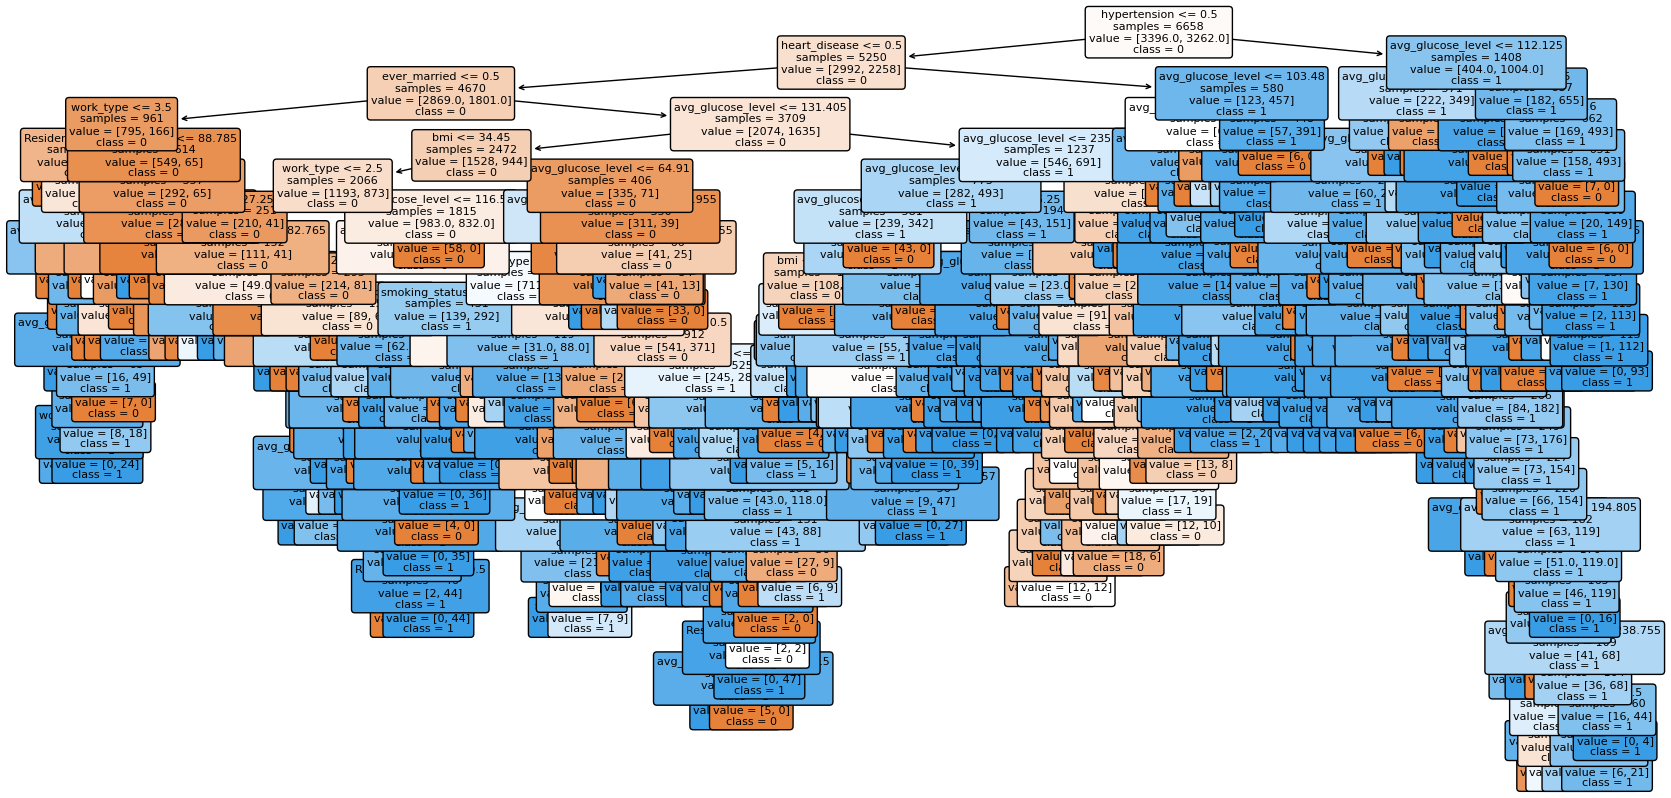

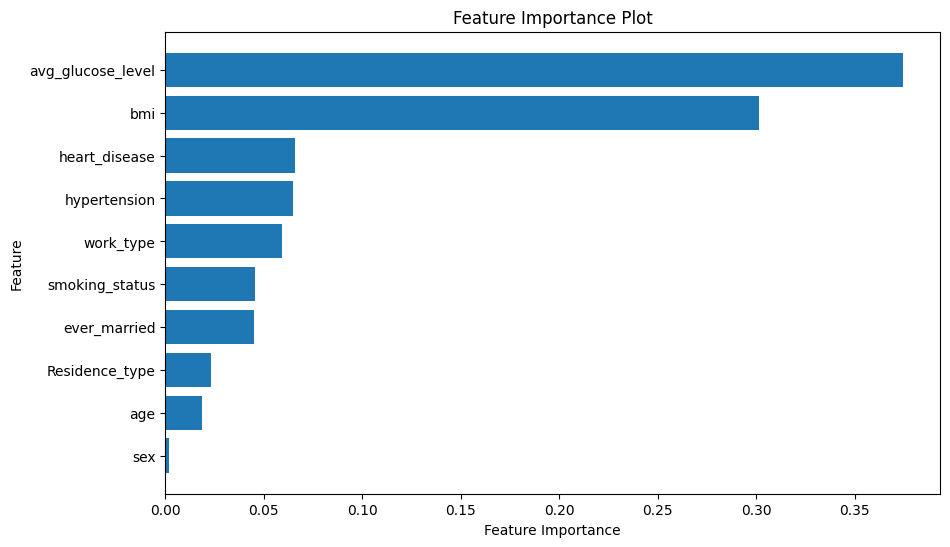

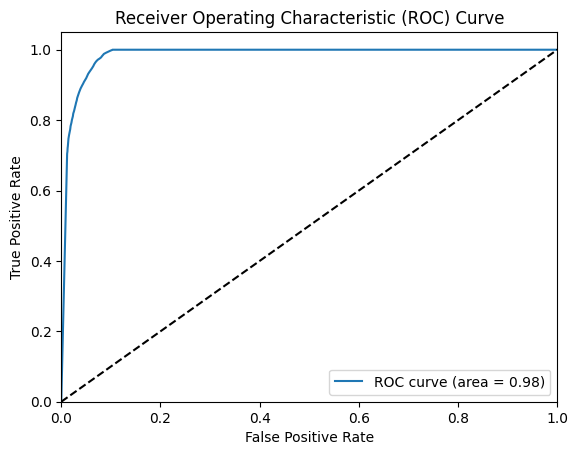

AUC Score: 0.9847621774666978


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8933933933933934, 0.9084084084084084, 0.9009009009009009, 0.8738738738738738, 0.8843843843843844, 0.8873873873873874, 0.9069069069069069, 0.8858858858858859, 0.8992481203007519, 0.881203007518797]
Mean accuracy: 0.8921592268960691
95% confidence interval: (0.883944938874836, 0.9003735149173021)


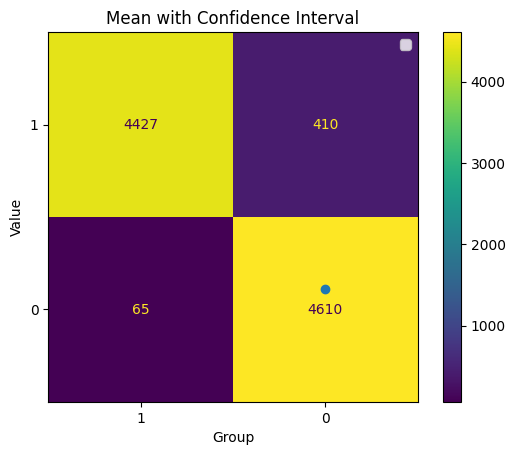


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 21.080108642578125
Best parameters found:  {'l2_regularization': 0.0, 'learning_rate': 0.3, 'max_depth': 8, 'max_iter': 194, 'min_samples_leaf': 5}
Best score on training data:  0.9595355086011705
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3396
           1       1.00      0.99      0.99      3262

    accuracy                           0.99      6658
   macro avg       0.99      0.99      0.99      6658
weighted avg       0.99      0.99      0.99      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1441
           1       0.95      0.95      0.95      1413

    accuracy                           0.95      2854
   ma

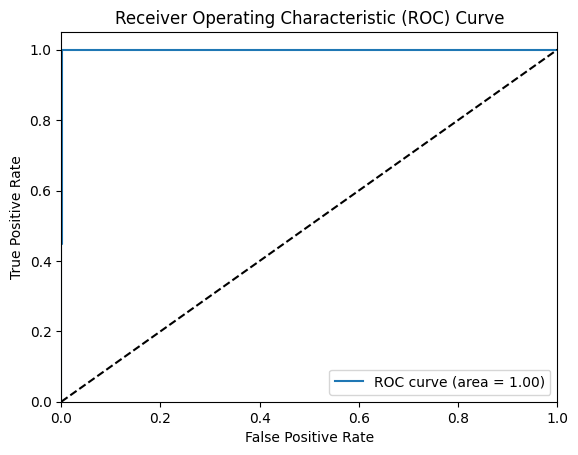

AUC Score: 0.9994744167894759


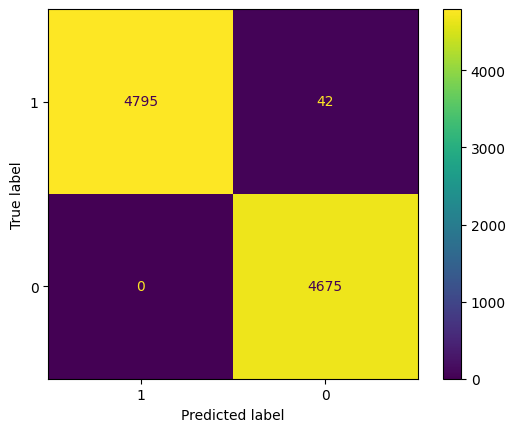

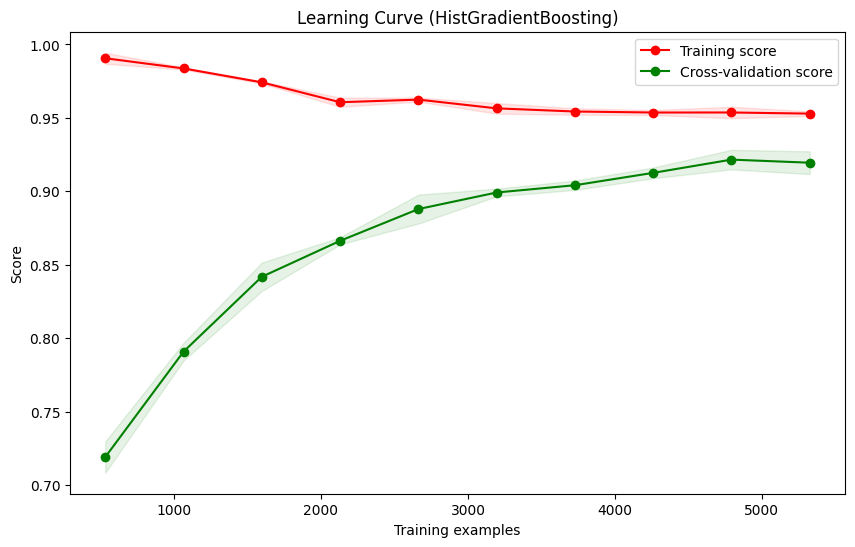

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9504504504504504, 0.9429429429429429, 0.954954954954955, 0.948948948948949, 0.9519519519519519, 0.9459459459459459, 0.9534534534534534, 0.9504504504504504, 0.9428571428571428, 0.9428571428571428]
Mean accuracy: 0.9484813384813385
95% confidence interval: (0.9452204350109932, 0.9517422419516839)


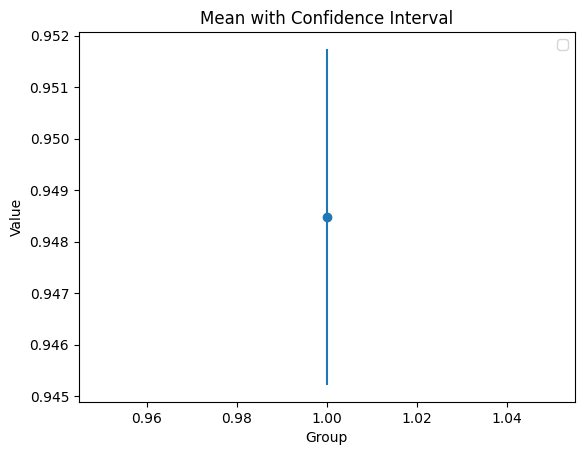


ORIGINAL VALUES RESTORED


In [4]:

df, indices, original_vals = couple_dirt_utils.insert_high_values_for_stroke(df,10)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = couple_dirt_utils.restore_original_values(df,original_vals)
print('\nORIGINAL VALUES RESTORED')


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3396
           1       0.90      0.92      0.91      3262

    accuracy                           0.91      6658
   macro avg       0.91      0.91      0.91      6658
weighted avg       0.91      0.91      0.91      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1441
           1       0.82      0.87      0.84      1413

    accuracy                           0.84      2854
   macro avg       0.84      0.84      0.84      2854
weighted avg       0.84      0.84      0.84      2854

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      4837
           1     

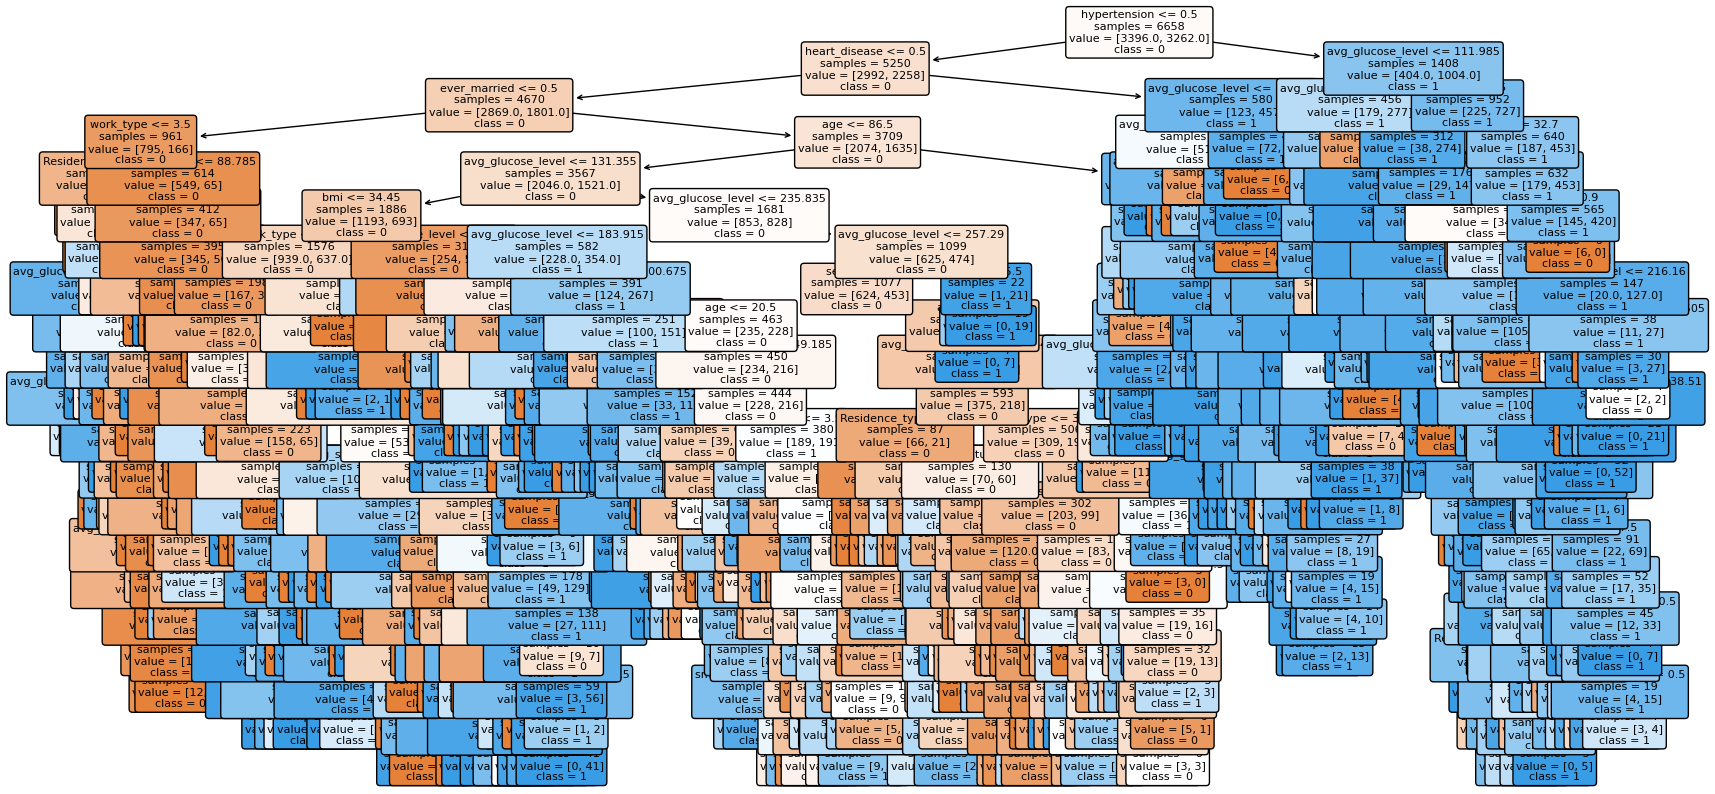

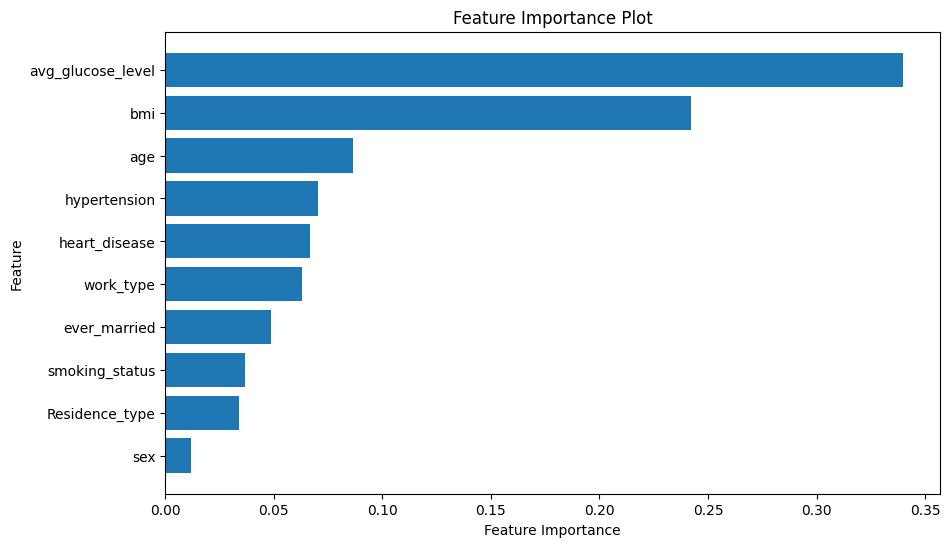

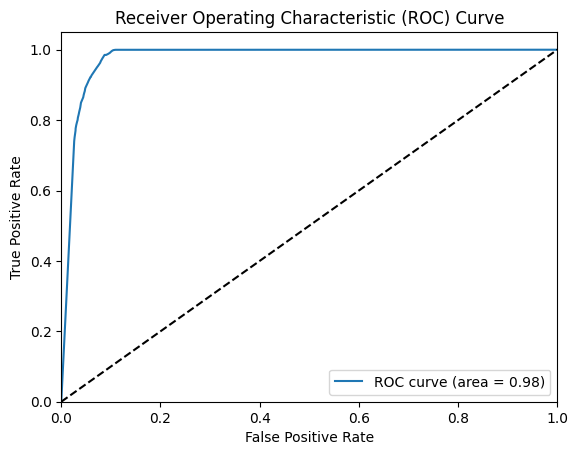

AUC Score: 0.9771267601896698
Accuracy for each fold: [0.8258258258258259, 0.7972972972972973, 0.8453453453453453, 0.8438438438438438, 0.8558558558558559, 0.8528528528528528, 0.8303303303303303, 0.8288288288288288, 0.8240601503759398, 0.8285714285714286]
Mean accuracy: 0.8332811759127547
95% confidence interval: (0.8210386935149167, 0.8455236583105928)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


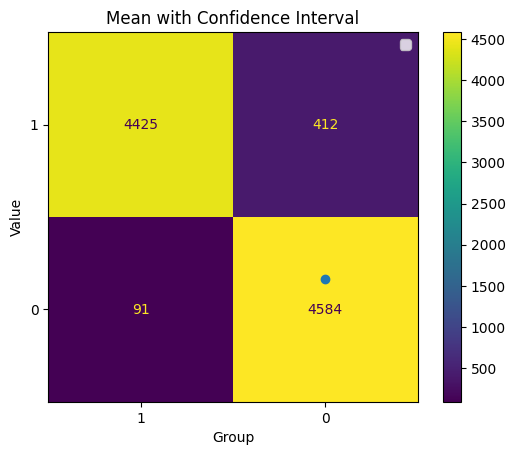


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 21.454148054122925
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'max_iter': 494, 'min_samples_leaf': 8}
Best score on training data:  0.8877981754807918
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3396
           1       0.93      0.91      0.92      3262

    accuracy                           0.92      6658
   macro avg       0.92      0.92      0.92      6658
weighted avg       0.92      0.92      0.92      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1441
           1       0.87      0.89      0.88      1413

    accuracy                           0.88      2854
   ma

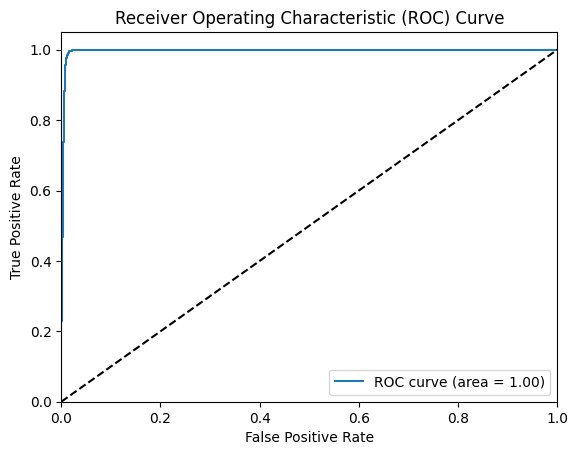

AUC Score: 0.9969282679523593


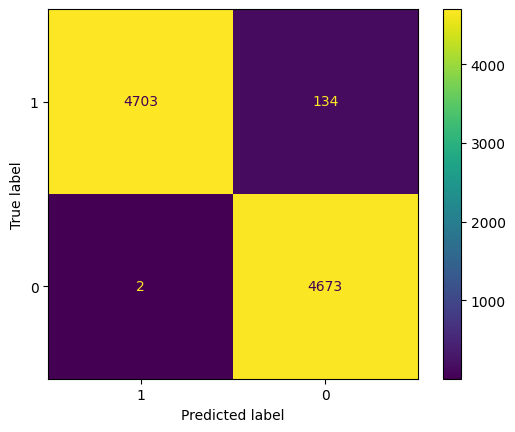

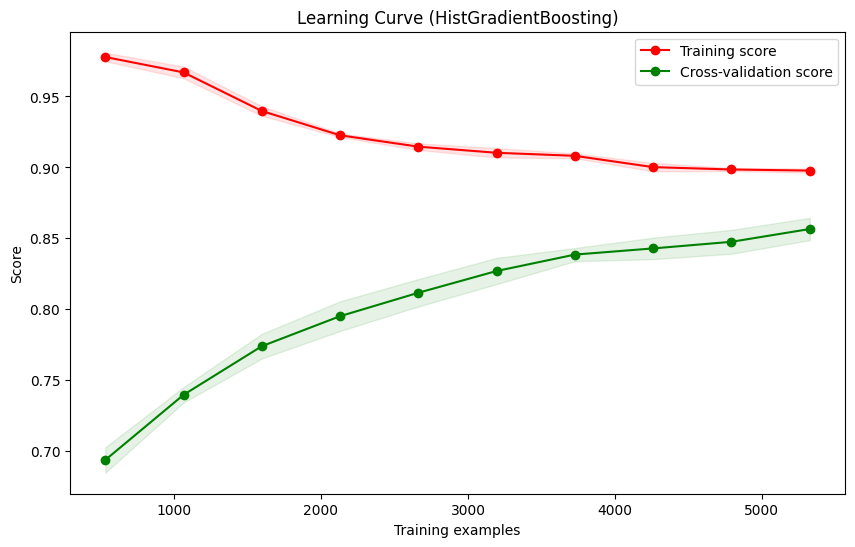

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8888888888888888, 0.8813813813813813, 0.8888888888888888, 0.8858858858858859, 0.8903903903903904, 0.8588588588588588, 0.8903903903903904, 0.8768768768768769, 0.8857142857142857, 0.8676691729323308]
Mean accuracy: 0.8814945020208178
95% confidence interval: (0.8738433195851594, 0.8891456844564762)


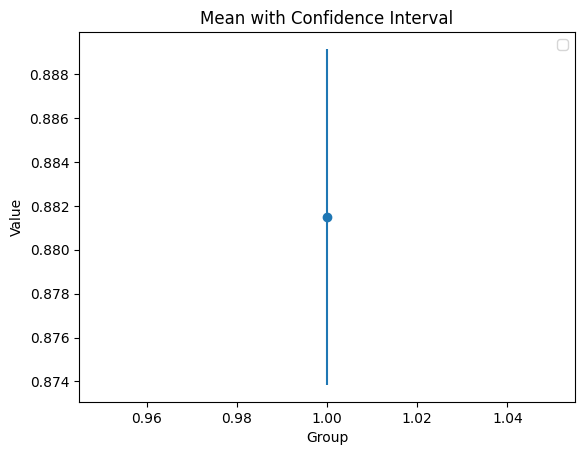


ORIGINAL VALUES RESTORED


In [5]:

df, indices, original_vals = couple_dirt_utils.insert_high_values_for_stroke(df,30)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = couple_dirt_utils.restore_original_values(df,original_vals)
print('\nORIGINAL VALUES RESTORED')


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3396
           1       0.82      0.82      0.82      3262

    accuracy                           0.83      6658
   macro avg       0.83      0.83      0.83      6658
weighted avg       0.83      0.83      0.83      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1441
           1       0.74      0.76      0.75      1413

    accuracy                           0.75      2854
   macro avg       0.75      0.75      0.75      2854
weighted avg       0.75      0.75      0.75      2854

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4837
           1     

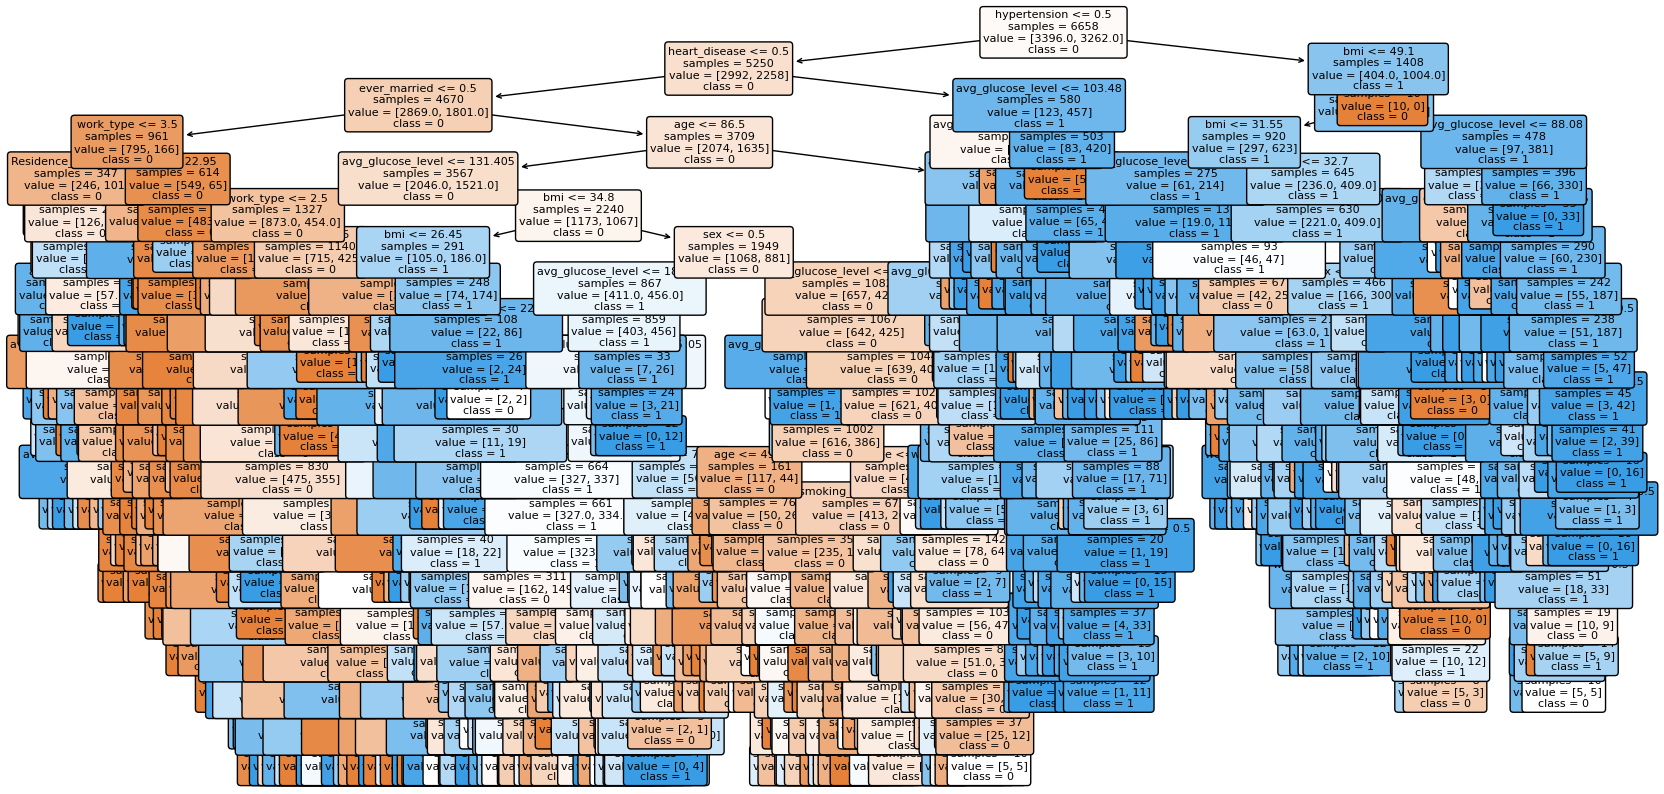

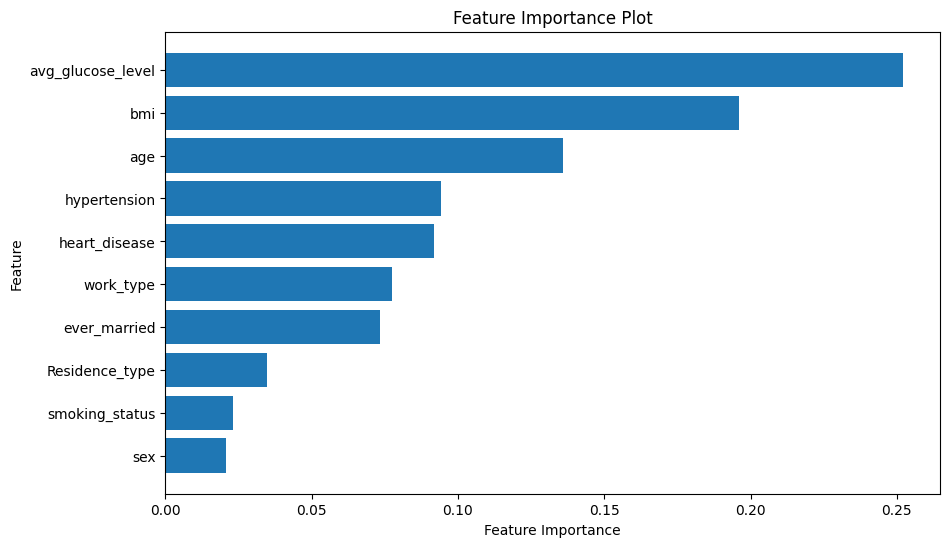

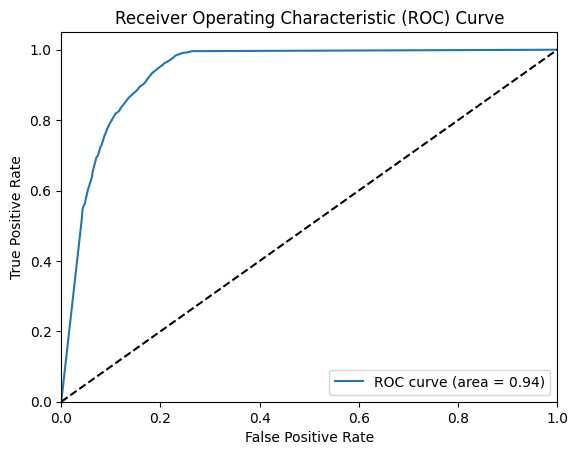

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9358266658854043
Accuracy for each fold: [0.7057057057057057, 0.7702702702702703, 0.7237237237237237, 0.6846846846846847, 0.7687687687687688, 0.7222222222222222, 0.7162162162162162, 0.7552552552552553, 0.7293233082706767, 0.7548872180451128]
Mean accuracy: 0.7331057373162636
95% confidence interval: (0.7128450299018955, 0.7533664447306317)


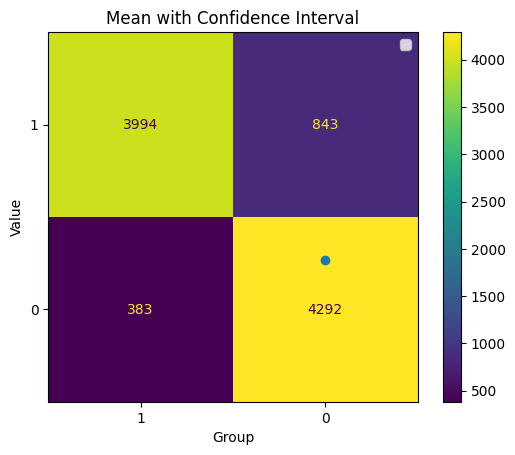


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 17.162492275238037
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.2, 'max_depth': 9, 'max_iter': 134, 'min_samples_leaf': 4}
Best score on training data:  0.8169834365223274
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3396
           1       0.88      0.86      0.87      3262

    accuracy                           0.87      6658
   macro avg       0.88      0.87      0.87      6658
weighted avg       0.87      0.87      0.87      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1441
           1       0.80      0.84      0.82      1413

    accuracy                           0.82      2854
   ma

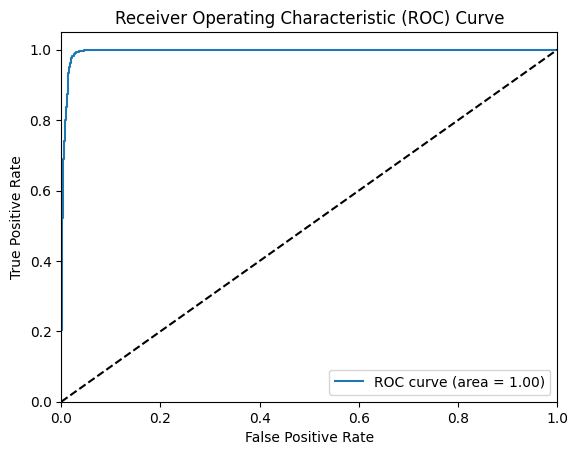

AUC Score: 0.9952374687541113


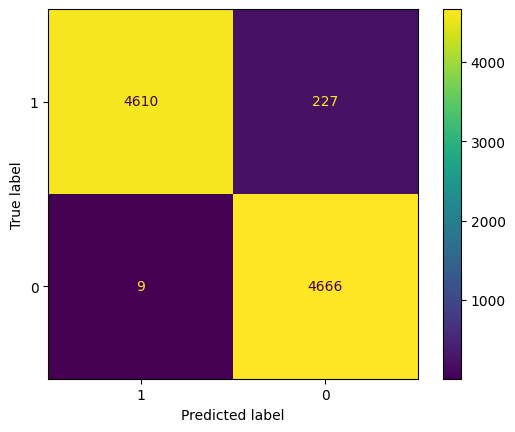

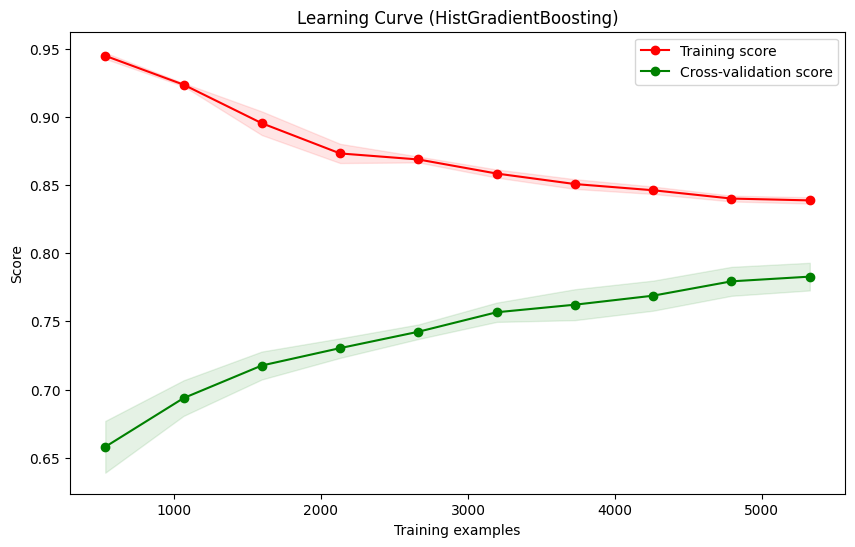

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8228228228228228, 0.7882882882882883, 0.8153153153153153, 0.7897897897897898, 0.8183183183183184, 0.8108108108108109, 0.7897897897897898, 0.8093093093093093, 0.8075187969924812, 0.8045112781954887]
Mean accuracy: 0.8056474519632415
95% confidence interval: (0.796731294836418, 0.814563609090065)


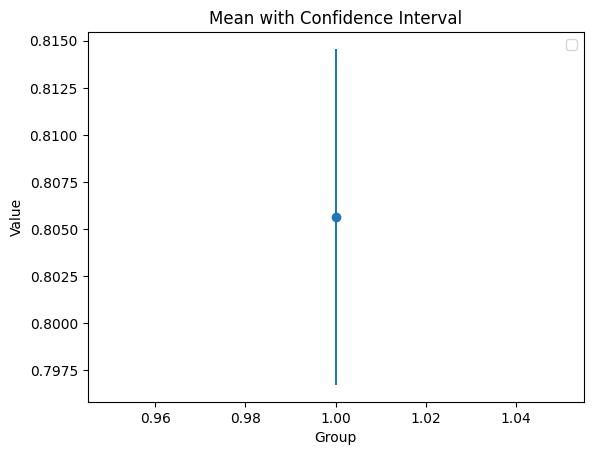


ORIGINAL VALUES RESTORED


In [6]:

df, indices, original_vals = couple_dirt_utils.insert_high_values_for_stroke(df,50)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = couple_dirt_utils.restore_original_values(df,original_vals)
print('\nORIGINAL VALUES RESTORED')